In [2]:
!wget -O train1.csv http://iloveptit.com/trainH.csv

--2023-07-25 11:22:13--  http://iloveptit.com/trainH.csv
Resolving iloveptit.com (iloveptit.com)... 95.111.198.69
Connecting to iloveptit.com (iloveptit.com)|95.111.198.69|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 33530768 (32M) [text/csv]
Saving to: ‘train1.csv’

train1.csv          100%[===================>]  31.98M  11.4MB/s    in 2.8s    

2023-07-25 11:22:16 (11.4 MB/s) - ‘train1.csv’ saved [33530768/33530768]



In [3]:
!wget -O test.csv http://iloveptit.com/test.csv

--2023-07-25 11:22:16--  http://iloveptit.com/test.csv
Resolving iloveptit.com (iloveptit.com)... 95.111.198.69
Connecting to iloveptit.com (iloveptit.com)|95.111.198.69|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 32746165 (31M) [text/csv]
Saving to: ‘test.csv’

test.csv            100%[===================>]  31.23M  10.6MB/s    in 2.9s    

2023-07-25 11:22:19 (10.6 MB/s) - ‘test.csv’ saved [32746165/32746165]



In [4]:
import pandas as pd
import numpy as np

test = pd.read_csv("/content/test.csv")
df = pd.read_csv("/content/train1.csv")
test

,sentences,labels
0,"b""There are films that make careers. For Georg...",1
1,"b""A blackly comic tale of a down-trodden pries...",1
2,"b'Scary Movie 1-4, Epic Movie, Date Movie, Mee...",0
3,b'Poor Shirley MacLaine tries hard to lend som...,0
4,b'As a former Erasmus student I enjoyed this f...,1
...,...,...
24995,"b""Feeling Minnesota is not really a road movie...",0
24996,"b'This is, without doubt, one of my favourite ...",1
24997,"b""Most predicable movie I've ever seen...extre...",0
24998,"b""It's exactly what I expected from it. Relaxi...",1


In [5]:
df['sentences'].iloc[2]

"b'Mann photographs the Alberta Rocky Mountains in a superb fashion, and Jimmy Stewart and Walter Brennan give enjoyable performances as they always seem to do. <br /><br />But come on Hollywood - a Mountie telling the people of Dawson City, Yukon to elect themselves a marshal (yes a marshal!) and to enforce the law themselves, then gunfighters battling it out on the streets for control of the town? <br /><br />Nothing even remotely resembling that happened on the Canadian side of the border during the Klondike gold rush. Mr. Mann and company appear to have mistaken Dawson City for Deadwood, the Canadian North for the American Wild West.<br /><br />Canadian viewers be prepared for a Reefer Madness type of enjoyable howl with this ludicrous plot, or, to shake your head in disgust.'"

In [6]:
# check for duplicate values
df.duplicated().sum()

96

In [7]:
# remove duplicates
df = df.drop_duplicates(keep='first')

In [8]:
df.groupby('labels').describe()

sentences                                                            \
           count unique                                                top   
labels                                                                       
0          12432  12432  b"This was an absolutely terrible movie. Don't...   
1          12472  12472  b'This is the kind of film for a snowy Sunday ...   

             
       freq  
labels       
0         1  
1         1

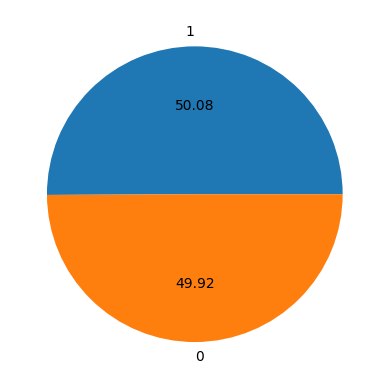

In [9]:
import matplotlib.pyplot as plt
plt.pie(df['labels'].value_counts(), labels=['1','0'],autopct="%0.2f")
plt.show()

In [10]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [11]:
from nltk.corpus import stopwords
stopwords_list = stopwords.words('english')
print(stopwords_list)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [12]:
text_feat = df['sentences'].copy()
text_feat1 = test['sentences'].copy()

In [13]:
import re,string
def remove_hyperlink(word):
    return  re.sub(r"http\S+", "", word)


def to_lower(word):
    result = word.lower()
    return result

def remove_number(word):
    result = re.sub(r'\d+', '', word)
    return result

def remove_punctuation(word): #bỏ dấu câu
    result = word.translate(str.maketrans(dict.fromkeys(string.punctuation)))
    return result


def remove_whitespace(word):
    result = word.strip()
    return result

def replace_newline(word):
    return word.replace('\n','')


def remove_extra_whitespace(word):
    return ' '.join(word.split())

def remove_stopwords(word):
    stop_words = set(stopwords.words('english'))
    filtered_word = [w for w in word.split() if not w in stop_words]
    return " ".join(filtered_word)




def remove_emoji(text):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

def clean_up_pipeline(sentence):
    cleaning_utils = [remove_hyperlink,
                      replace_newline,
                      to_lower,
                      remove_number,
                      remove_punctuation,remove_whitespace,
                      remove_extra_whitespace,
                      remove_emoji]
    for o in cleaning_utils:
        sentence = o(sentence)
    return sentence
x_train = [clean_up_pipeline(o) for o in text_feat]
x_test = [clean_up_pipeline(o) for o in text_feat1]

# x_train[0]

In [14]:
print(clean_up_pipeline("But come on Hollywood - a Mountie telling the people of Dawson City, Yukon to elect themselves a marshal (yes a marshal!) and to enforce the law themselves, then gunfighters battling it out on the streets for control of the town?"))

but come on hollywood a mountie telling the people of dawson city yukon to elect themselves a marshal yes a marshal and to enforce the law themselves then gunfighters battling it out on the streets for control of the town


In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Gộp tập huấn luyện và kiểm tra thành một tập dữ liệu
all_data = x_train + x_test

# Sử dụng TfidfVectorizer trên tất cả dữ liệu đầu vào
vectorizer = TfidfVectorizer(analyzer='word',stop_words= 'english')
all_features = vectorizer.fit_transform(all_data)

# Chia tập huấn luyện và tập kiểm tra từ tập dữ liệu gộp
num_train = len(x_train)
train_features = all_features[:num_train]
test_features = all_features[num_train:]

In [17]:
y_train = df['labels'].copy()
y_test = test['labels'].copy()

In [18]:
from sklearn.metrics import accuracy_score

from sklearn.metrics import precision_score
from sklearn.linear_model import LogisticRegression
lrc = LogisticRegression(solver='liblinear', penalty='l1')


In [19]:
lrc.fit(train_features,y_train)

LogisticRegression(penalty='l1', solver='liblinear')

In [21]:
lrc.score(test_features,y_test)

0.8716

In [22]:
# Dự đoán nhãn cho một câu mới
new_sentence = "I hate this movie and don't want to see again"
new_feature = vectorizer.transform([new_sentence]) # Biến đổi câu thành feature
predicted_label = lrc.predict(new_feature) # Dự đoán nhãn của câu
print("Predicted label for the new sentence:", predicted_label)

Predicted label for the new sentence: [0]
